### Imports

In [5]:
import numpy as np
import pandas as pd

### Load dataset

In [6]:
df = pd.read_csv('./HR_comma_sep.csv')
pd.set_option('display.max_columns', None)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df0 = df.rename(columns={
    'time_spend_company': 'tenure'
})
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
df0.duplicated().sum()

np.int64(3008)

In [12]:
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Data Cleaning

In [13]:
df1 = df0.drop_duplicates(keep='first')
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Remove outliers
The `df.describe()` result gave a noticable spread of tenure values. Because regression model is sensitive to outliers let's remove them.

<Axes: ylabel='tenure'>

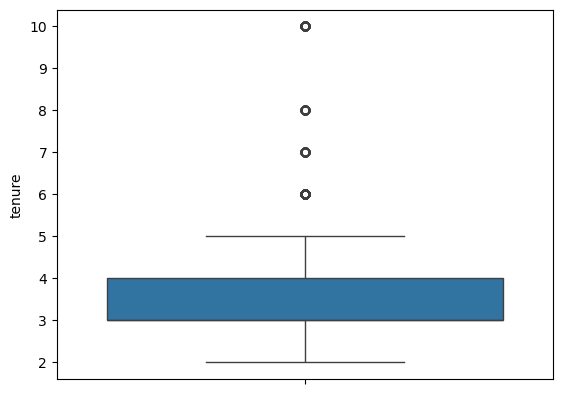

In [14]:
import seaborn as sns
sns.boxplot(df1.tenure)

In [15]:
q1 = df1.tenure.quantile(0.25)
q3 = df1.tenure.quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print(f"{lower} < x < {upper}")
outliers = df1[(df1.tenure > upper) | (df1.tenure < lower)]
outliers

1.5 < x < 5.5


,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


### Continue EDA
Lets see % of people who left

In [16]:
print(df1.left.mean())
df1.left.value_counts()

0.1660411975648403


left
0    10000
1     1991
Name: count, dtype: int64

Lets check distributions of employees who left with their work hours

<Axes: xlabel='average_montly_hours', ylabel='number_project'>

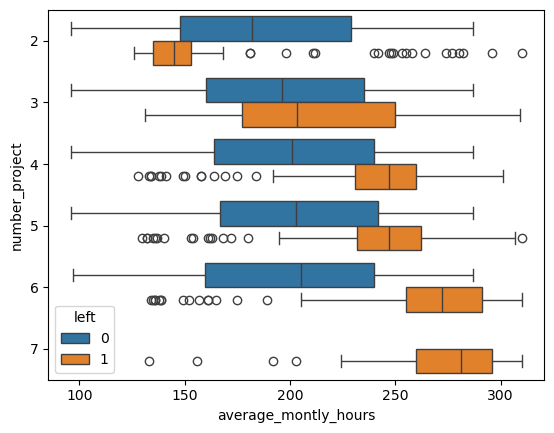

In [17]:
sns.boxplot(df1, x="average_montly_hours", y="number_project", hue='left', orient='h')

<Axes: xlabel='number_project', ylabel='Count'>

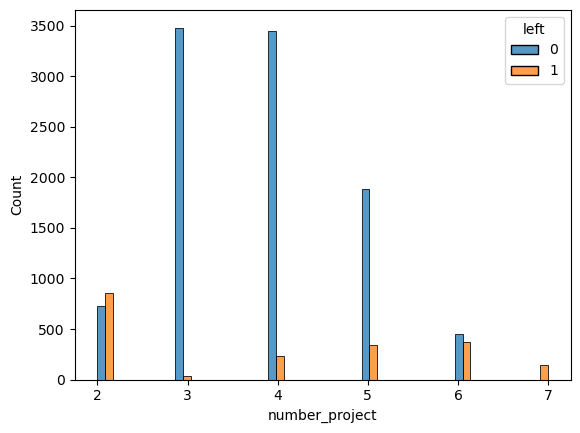

In [18]:
sns.histplot(df1, x="number_project", hue="left", multiple="dodge")

A few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = `50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

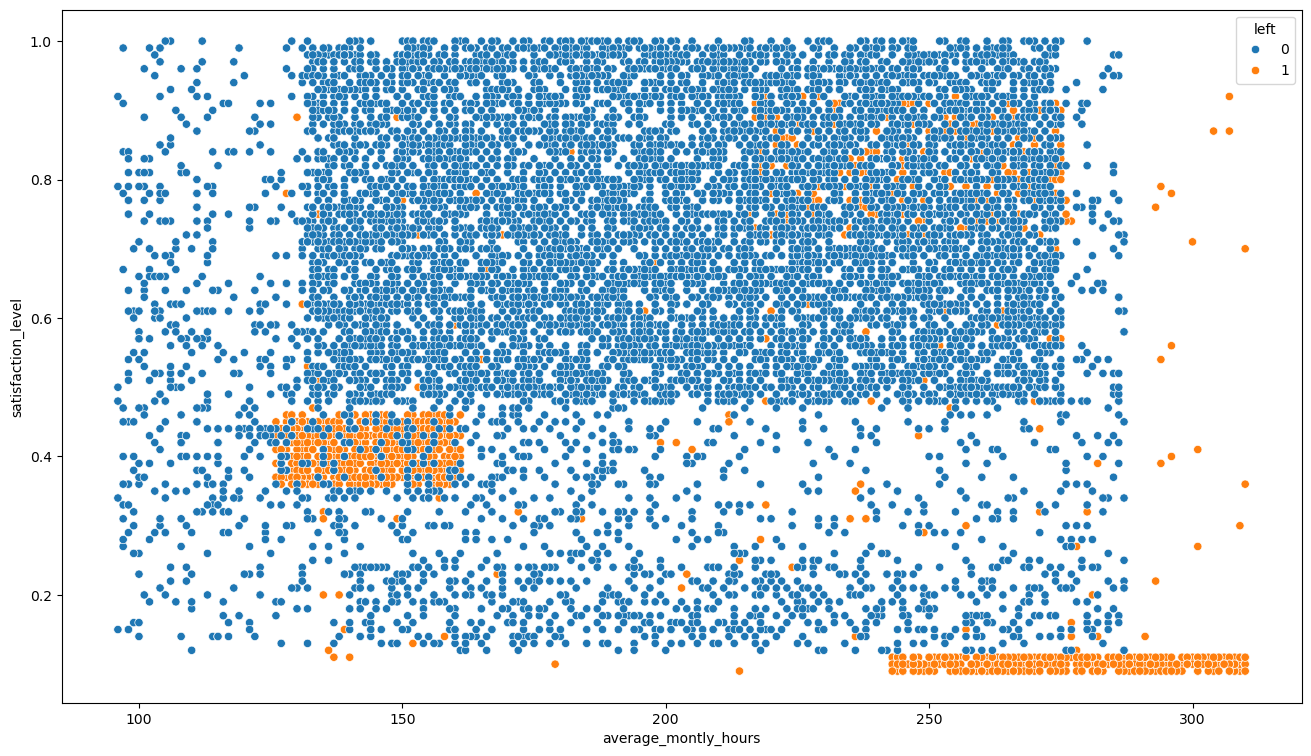

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
sns.scatterplot(df1, x="average_montly_hours", y="satisfaction_level", hue="left")

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

### Satisfaction ~ Tenure

<Axes: xlabel='satisfaction_level', ylabel='tenure'>

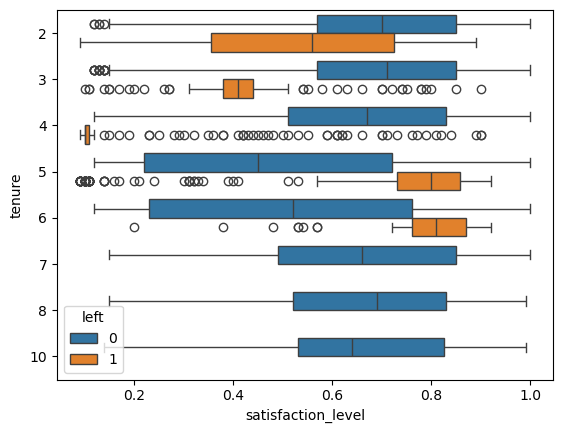

In [20]:
sns.boxplot(df1, x="satisfaction_level", y="tenure", hue="left", orient='h')

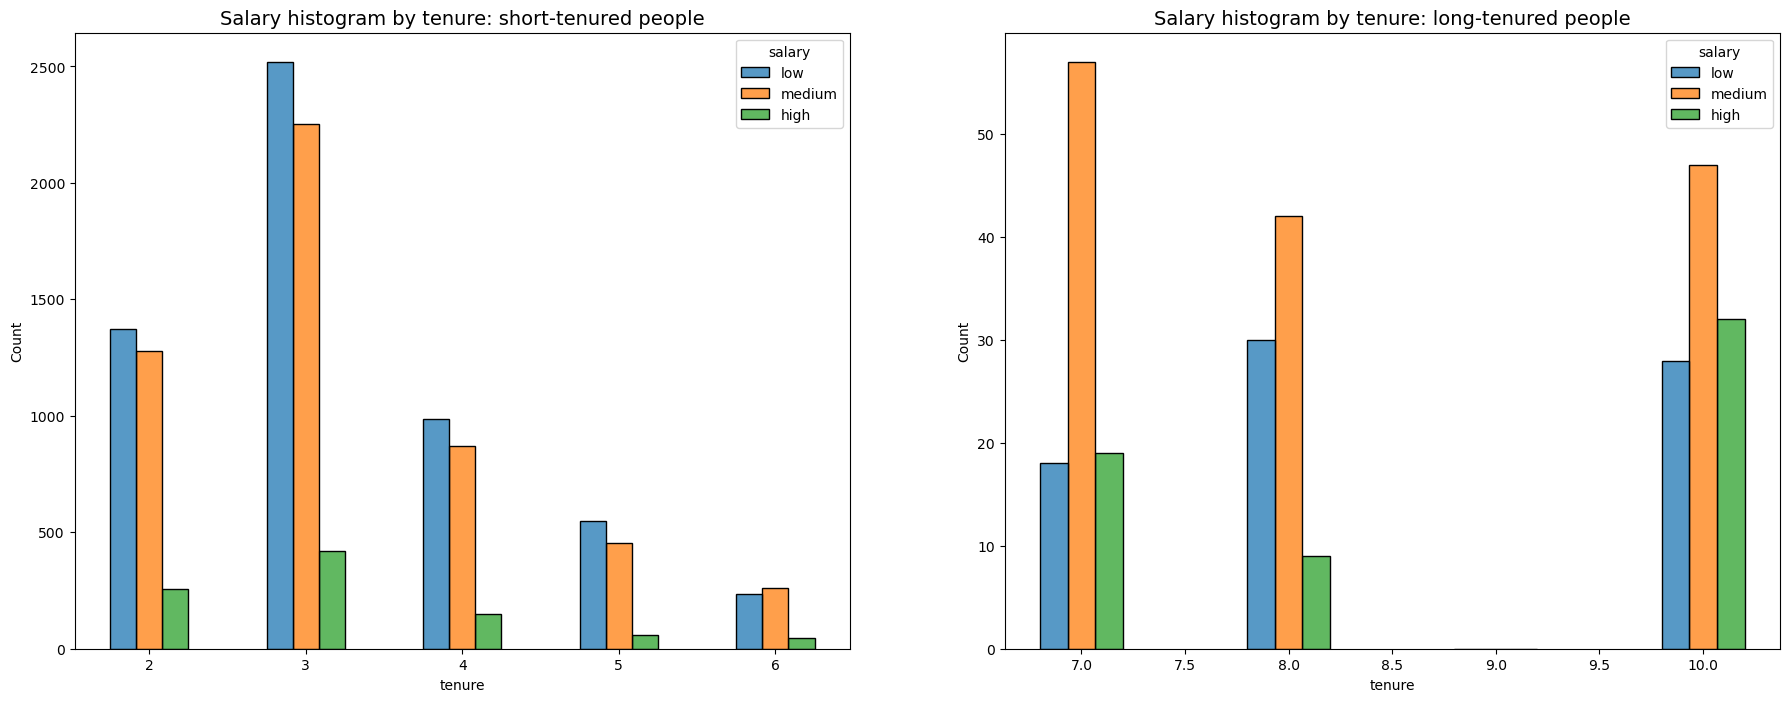

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

### Working Hours ~ Performance Evaluation

<Axes: xlabel='average_montly_hours', ylabel='last_evaluation'>

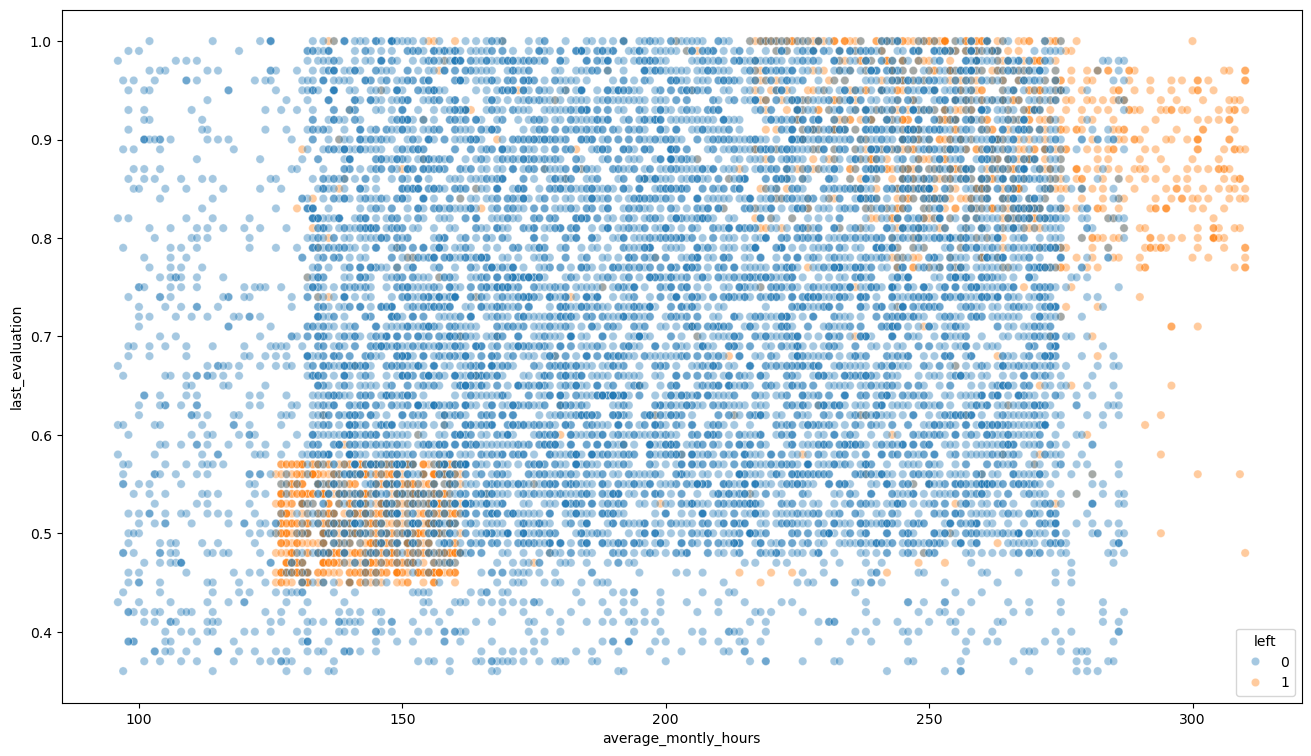

In [22]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_montly_hours', y='last_evaluation', hue='left', alpha=0.4)

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.

### Work Hours ~ Promotion

<Axes: xlabel='average_montly_hours', ylabel='promotion_last_5years'>

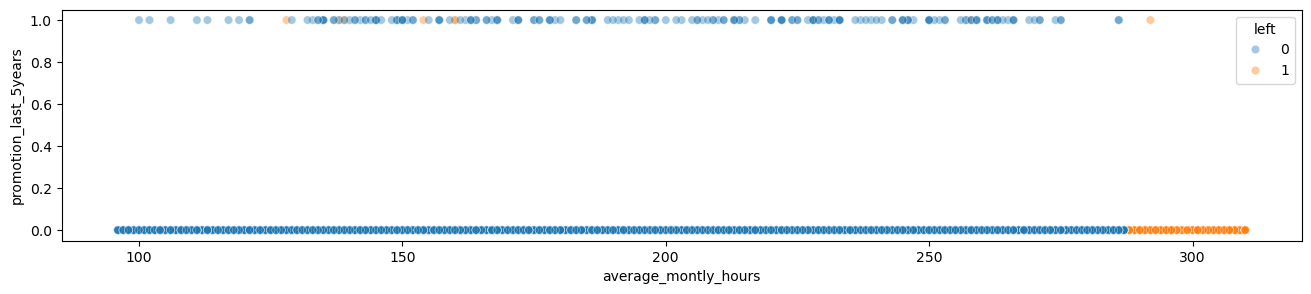

In [23]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_montly_hours', y='promotion_last_5years', hue='left', alpha=0.4)

- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  


### Department

In [24]:
df1["Department"].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

<Axes: xlabel='Department', ylabel='Count'>

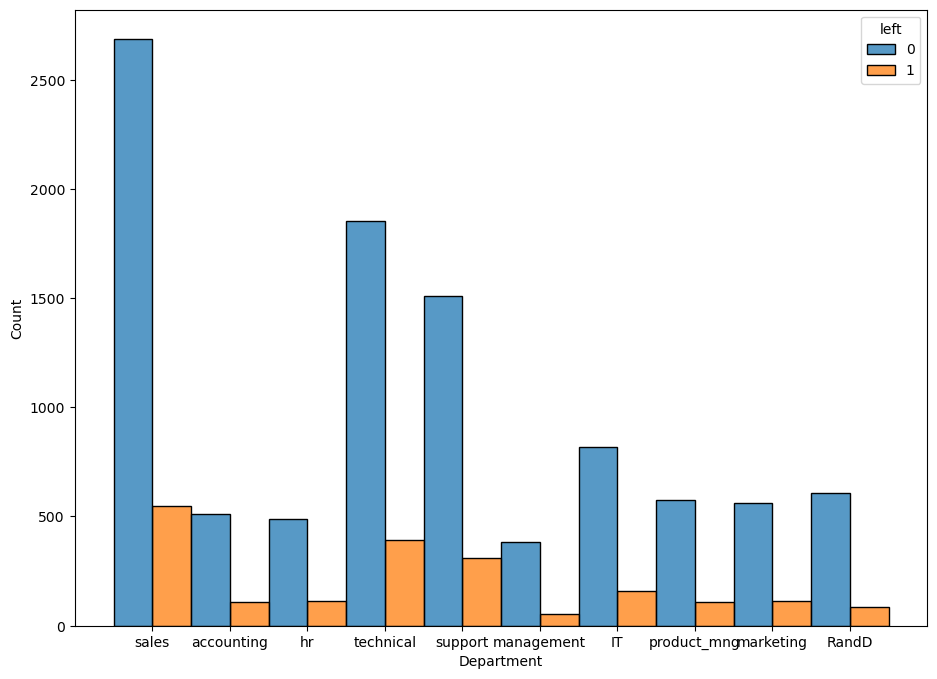

In [25]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Department', hue='left',hue_order=[0, 1], multiple='dodge')

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 


### Statistical Correlation

<Axes: >

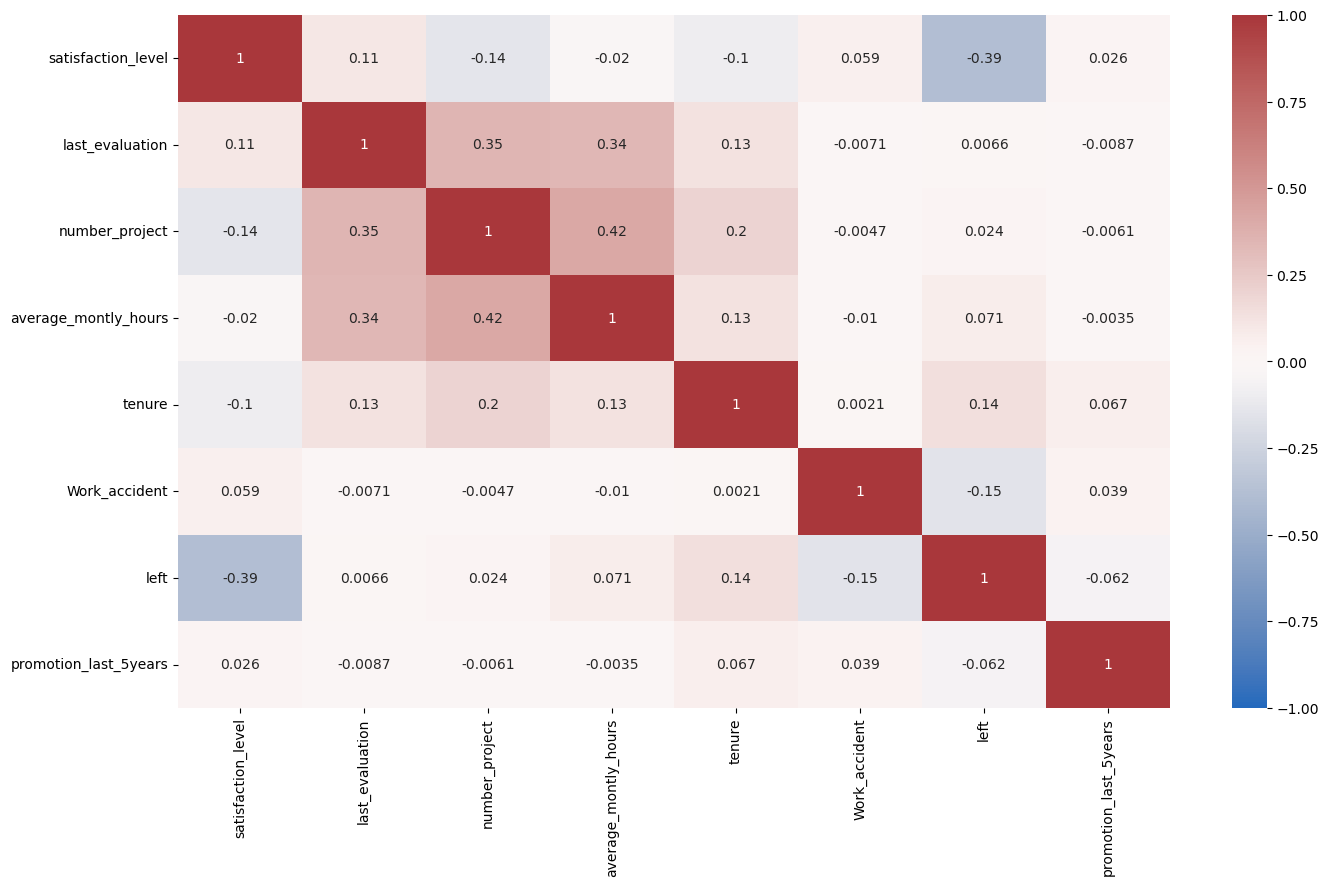

In [26]:
plt.figure(figsize=(16, 9))
sns.heatmap(df0.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Initial Findings
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

## Model Construction

### Preparations

In [27]:
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


<Axes: >

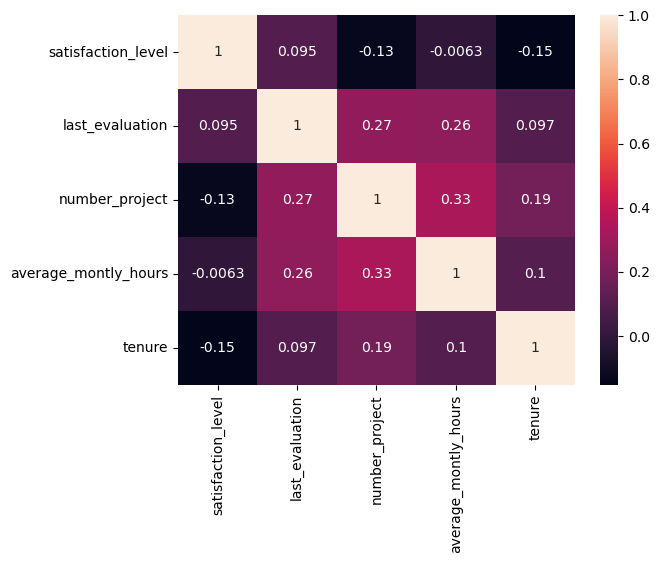

In [28]:
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'tenure']]
            .corr(), annot=True)

<Axes: xlabel='Department'>

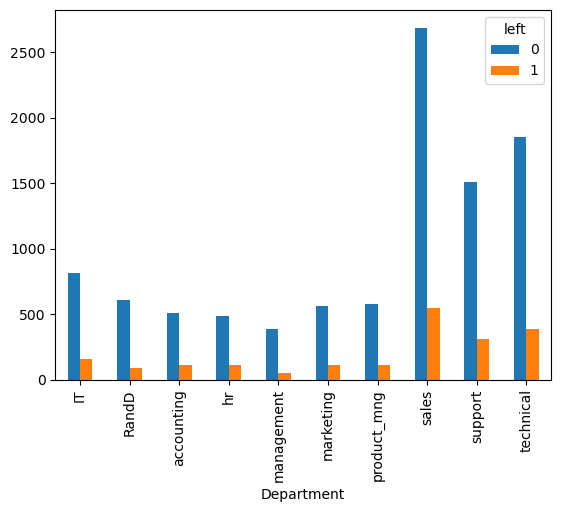

In [29]:
pd.crosstab(df1['Department'], df1['left']).plot(kind ='bar')

### Model 1: Logistic Regression

In [30]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower) & (df_enc['tenure'] <= upper)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


set target variable and features

In [31]:
y = df_logreg['left']
X = df_logreg.drop('left', axis=1)

In [32]:
# Split the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [34]:
y_pred = model1.predict(X_test)

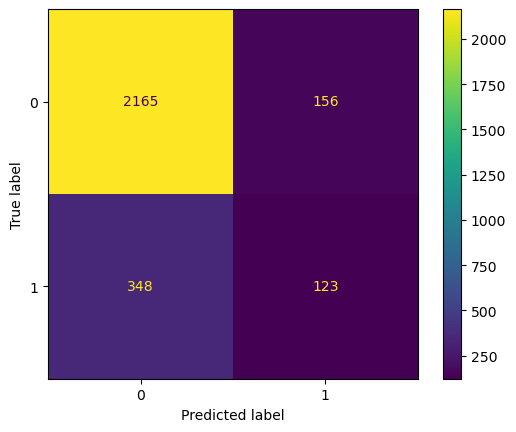

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=model1.classes_)
log_disp.plot(values_format='')
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Would Stay', 'Would Left']))

              precision    recall  f1-score   support

  Would Stay       0.86      0.93      0.90      2321
  Would Left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



### Model 2: Random Forest

In [37]:
# Tree based models doen't require scaling
y = df_enc['left']
X = df_enc.drop('left', axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model2 = DecisionTreeClassifier(random_state=0)

params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv = GridSearchCV(model2, params, scoring=scoring, cv=4, refit='roc_auc')

In [40]:
%%time
cv.fit(X_train, y_train)

CPU times: total: 781 ms
Wall time: 1.99 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [41]:
cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [42]:
cv.best_score_

np.float64(0.969819392792457)

## Model 3: Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

model3 = GridSearchCV(rf, params, scoring=scoring, cv=4, refit='roc_auc')

In [44]:
%%time
model3.fit(X_train, y_train)

# wow that took a while, lets save the model so we don't have to do it again
import pickle
with open('model3.pkl', 'wb') as f:
    pickle.dump(model3, f)

CPU times: total: 5min 5s
Wall time: 13min 30s


In [50]:
with open('model3.pkl', 'rb') as f:
    model3 = pickle.load(f)

In [51]:
model3.best_score_

np.float64(0.9804250949807172)

In [52]:
model3.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [53]:
metric_of_interest = {'mean_test_roc_auc': 'auc',
                      'mean_test_precision': 'precision',
                      'mean_test_recall': 'recall',
                      'mean_test_f1': 'f1',
                      'mean_test_accuracy': 'accuracy'
                     }
result = pd.DataFrame(model3.cv_results_)
result = result.iloc[result['mean_test_roc_auc'].idxmax(), :][metric_of_interest.keys()]
result.rename(metric_of_interest)

auc          0.980425
precision    0.950023
recall       0.915614
f1           0.932467
accuracy     0.977983
Name: 41, dtype: object

<Axes: ylabel='None'>

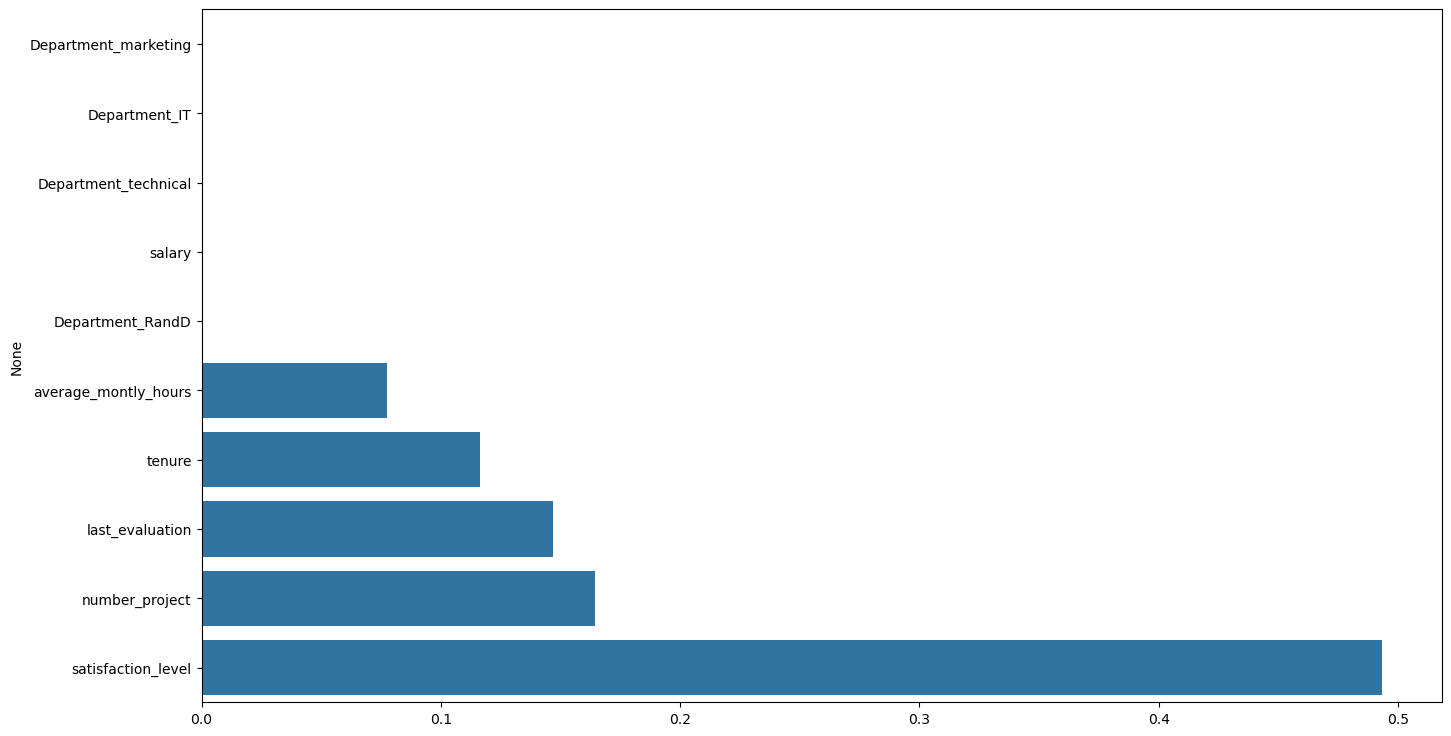

In [57]:
i = np.argpartition(model3.best_estimator_.feature_importances_, -10)[-10:]
importance = X.columns[i]

plt.figure(figsize=(16, 9))
sns.barplot(x=model3.best_estimator_.feature_importances_[i], y=importance, orient='h')

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 